<ipython-input-3-3722abb98071>:8: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  x1,y1=np.random.multivariate_normal(mean1,cov1,100).T
<ipython-input-3-3722abb98071>:17: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  x2,y2=np.random.multivariate_normal(mean2,cov2,100).T


[  4.71676699  -0.63422446  -1.23177851   6.02426764   0.20678891
   2.29584485   3.75912125   8.81345173   2.53963313   3.77267988
   0.24595008  -6.92992676   9.07141272 -10.37162923   4.52854689
  11.12418074  -3.3042612   12.07210354   7.47058944  -6.62353869
 -12.27086794   4.31836803   2.52138933  -2.8949488   -4.6834352
   2.00743831  -2.36050903 -11.24942106 -13.02896867  15.89968706
  -0.53819061  -4.27320274  -3.92350557   7.11932489   3.73138074
  -3.19709517  -6.16909411  -5.4160953   18.85011136  -3.57981456
  -3.68369892  -2.77845638   8.78680508   0.99794589  -6.72961217
   2.39025821   3.01052583   3.17430525  -6.14319959   7.64223217
  10.26871605   0.25756157  14.06378735   6.14737154  -1.92170394
   2.32052497   2.10827006   3.45656184  -1.41941871   3.97957719
   7.74615112  12.62938316  -6.2595182   -8.52864474   0.55296442
   3.03291461  -1.14905803 -12.67835327  -4.1990977    2.23151024
  -5.22331917  -4.0931761    6.33093544   5.92879271  -0.94117392
  -9.216975

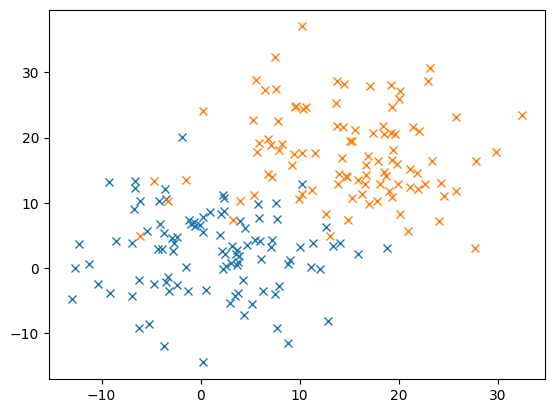

In [3]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

mean1=[1,2]
#cov1=[[40,0],[0,40]]
cov1=[[0,40],[40,0]]
x1,y1=np.random.multivariate_normal(mean1,cov1,100).T
plt.plot(x1,y1,'x')
#plt.axis('equal')
print(x1, y1)


mean2=[15,18]
#cov2=[[50,0],[0,50]]
cov2=[[0,50],[50,0]]
x2,y2=np.random.multivariate_normal(mean2,cov2,100).T
plt.plot(x2,y2,'x')
#plt.axis('equal')
print(x2, y2)



In [4]:
#Creating DataFrames

import pandas as pd
Data1 = {'X':x1, 'Y':y1, 'Class' : 'c1'}
df1 = pd.DataFrame(Data1)

Data2 = {'X':x2, 'Y':y2, 'Class' : 'c2'}
df2 = pd.DataFrame(Data2)

df = df1.append(df2)

print(df)



            X          Y Class
0    4.716767   3.531521    c1
1   -0.634224   7.010731    c1
2   -1.231779  -3.521044    c1
3    6.024268   4.102107    c1
4    0.206789   7.754562    c1
..        ...        ...   ...
95  21.161173  12.398140    c2
96  16.628417  12.801884    c2
97  19.057576  11.814860    c2
98  10.227176  11.382203    c2
99  17.952637  16.476113    c2

[200 rows x 3 columns]


<ipython-input-4-53b294e88e12>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df1.append(df2)


In [5]:
df.drop('Class',axis=1)
df['Class']

0     c1
1     c1
2     c1
3     c1
4     c1
      ..
95    c2
96    c2
97    c2
98    c2
99    c2
Name: Class, Length: 200, dtype: object

In [6]:

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn import datasets
import matplotlib.pyplot as plt


In [7]:
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit()
knn.predict()

In [9]:
(x_train, x_test, y_train, y_test) = train_test_split(df.drop('Class',axis=1),df['Class'], test_size=0.25, random_state=42)

k_range=range(2,10)
scores={}
scores_list=[]
#x_train=np.expand_dims(x_train,1)
for k in k_range:
  knn=KNeighborsClassifier(n_neighbors=k)
  knn.fit(x_train,y_train)
  y_pred=knn.predict(x_test)
  scores[k]=metrics.accuracy_score(y_test,y_pred)
  scores_list.append(scores[k])


{2: 0.98, 3: 0.94, 4: 0.98, 5: 0.96, 6: 0.98, 7: 0.98, 8: 0.98, 9: 0.98}

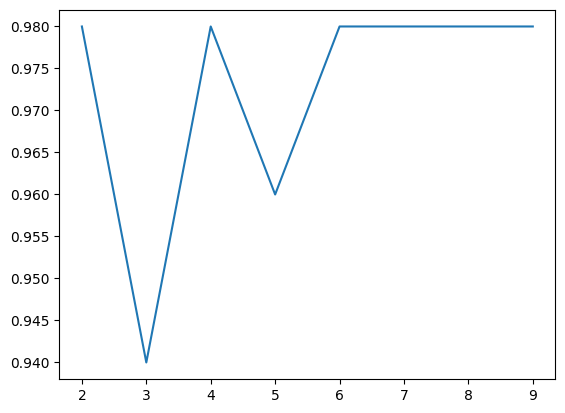

In [11]:
plt.plot(k_range,scores_list)
scores


In [ ]:
#MNIST use and split

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn import datasets
import matplotlib.pyplot as plt


mnist = datasets.load_digits()
(x_train, x_test, y_train, y_test) = train_test_split(np.array(mnist.data), mnist.target, test_size=0.25, random_state=42)

k_range=range(1,50)
scores={}
scores_list=[]
#x_train=np.expand_dims(x_train,1)
for k in k_range:
  knn=KNeighborsClassifier(n_neighbors=k)
  knn.fit(x_train,y_train)
  y_pred=knn.predict(x_test)
  scores[k]=metrics.accuracy_score(y_test,y_pred)
  scores_list.append(scores[k])


In [ ]:
mnist

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

{1: 0.9822222222222222,
 2: 0.9844444444444445,
 3: 0.9866666666666667,
 4: 0.9866666666666667,
 5: 0.9933333333333333,
 6: 0.9955555555555555,
 7: 0.9933333333333333,
 8: 0.9888888888888889,
 9: 0.9866666666666667,
 10: 0.9866666666666667,
 11: 0.98,
 12: 0.98,
 13: 0.98,
 14: 0.9822222222222222,
 15: 0.98,
 16: 0.9777777777777777,
 17: 0.98,
 18: 0.9777777777777777,
 19: 0.9777777777777777,
 20: 0.9777777777777777,
 21: 0.9777777777777777,
 22: 0.98,
 23: 0.9777777777777777,
 24: 0.9755555555555555,
 25: 0.9733333333333334,
 26: 0.9733333333333334,
 27: 0.9711111111111111,
 28: 0.9711111111111111,
 29: 0.9711111111111111,
 30: 0.9688888888888889,
 31: 0.9688888888888889,
 32: 0.9666666666666667,
 33: 0.9666666666666667,
 34: 0.9644444444444444,
 35: 0.9644444444444444,
 36: 0.9644444444444444,
 37: 0.9644444444444444,
 38: 0.9622222222222222,
 39: 0.96,
 40: 0.9577777777777777,
 41: 0.9577777777777777,
 42: 0.9577777777777777,
 43: 0.9577777777777777,
 44: 0.9555555555555556,
 45: 0.

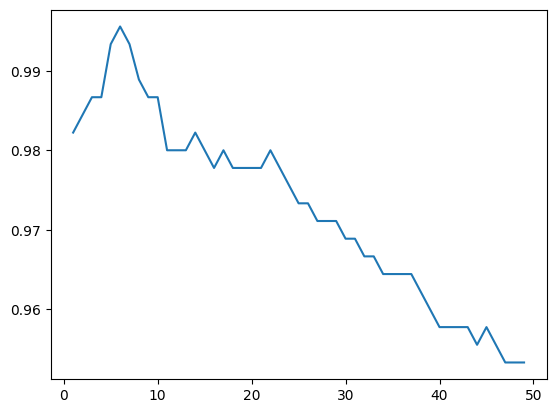

In [ ]:
plt.plot(k_range,scores_list)
scores


In [ ]:
len(mnist.target_names)

10